In [1]:
!pip install nltk

In [12]:
import pandas as pd
from datetime import datetime
import numpy as np

In [7]:
df_read = pd.read_csv("/content/drive/My Drive/Analytics Spring 2020/Work Streams/Core DS/Content Rec/DP Data/dp.csv")

In [16]:
sample=df_read.sort_values(by=['published_date'])
sample = sample.drop_duplicates()
df = sample.dropna()
df['date'] = pd.to_datetime(df['published_date'])
df1 = df[df.date > datetime.strptime("2009","%Y")]
df1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Unnamed: 0,id,uuid,title,slug,title_url,content,published_date,date
30680,30825,121752,81c4f5a9-8844-407f-a75f-88d5babf0996,"W. Squash | The coach can play, but can they?",w-squash-the-coach-can-play-but-can-they,2009/01/w-squash-the-coach-can-play-but-can-they,It's a good thing that coaches can't play for ...,2009-01-14 10:00:00,2009-01-14 10:00:00
30679,30824,121753,91b1aa4f-b2f6-4584-b319-56fc94990059,M. Swimming | Hot start in Florida cooled off ...,m-swimming-hot-start-in-florida-cooled-off-by-...,2009/01/m-swimming-hot-start-in-florida-cooled...,To say that the Penn men's swimming team took ...,2009-01-14 10:00:00,2009-01-14 10:00:00
30678,30823,121754,28011c67-1023-4323-a3cc-28dd02d513cb,W. Swimming | Ivy woes continue in the pool,w-swimming-ivy-woes-continue-in-the-pool,2009/01/w-swimming-ivy-woes-continue-in-the-pool,The women's swimming team rang in the New Year...,2009-01-14 10:00:00,2009-01-14 10:00:00
30677,30822,121734,2da73f43-5dec-47e5-bb61-19e8b0b980f2,Sexual assault suspect still at large,sexual_assault_suspect_still_at_large,2009/01/sexual_assault_suspect_still_at_large,Police are still looking for the man who sexua...,2009-01-14 10:00:00,2009-01-14 10:00:00
30676,30821,121756,4c649f87-3ca8-4f53-b6f5-9f14e231a0c3,Sports brief | Gymnastics drops the Ball in op...,sports_brief_gymnastics_drops_the_ball_in_opener,2009/01/sports_brief_gymnastics_drops_the_ball...,"To start its 2009 season, the gymnastics team ...",2009-01-14 10:00:00,2009-01-14 10:00:00
...,...,...,...,...,...,...,...,...,...
85192,204,190843,ce8f0d5c-2f18-41c0-95a7-ea378e5fb068,Philadelphia School District backtracks from i...,philadephia-school-district-online-fall-semest...,2020/07/philadephia-school-district-online-fal...,Following backlash from its initial hybrid reo...,2020-07-31 04:03:10,2020-07-31 04:03:10
85191,203,190851,756bf521-150a-4aaa-be4f-0810dad60c00,"Penn professor wins inaugural $80,000 prize to...",nemo-prize-covid19-test-penn-coronavirus,2020/07/nemo-prize-covid19-test-penn-coronavirus,"César de la Fuente, Penn presidential assistan...",2020-07-31 04:30:46,2020-07-31 04:30:46
85190,202,190854,b85c710d-cd36-405c-bd77-d5c4f86da5e4,Pottruck will reopen under a phased approach f...,pottruck-phased-reopening-fitness-gym-coronavirus,2020/07/pottruck-phased-reopening-fitness-gym-...,"After temporarily closing in mid-March, Pottru...",2020-07-31 05:09:18,2020-07-31 05:09:18
85189,201,190856,c538e24a-d8b5-4ef7-8798-4a18161bc17c,The Trumps continued to spread misinformation ...,donald-trump-jr-2020-election-postpone-misinfo...,2020/07/donald-trump-jr-2020-election-postpone...,"This week, 1968 Wharton graduate and President...",2020-07-31 08:33:29,2020-07-31 08:33:29


In [20]:
sample_data = df1
import re
sample_data['content_p'] = sample_data['content'].astype(str)
sample_data['content_p'] = sample_data['content_p'].map(lambda x: x.lower())

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
pat = r'\b(?:{})\b'.format('|'.join(stop))
sample_data['content_p'] = sample_data['content_p'].str.replace(pat, '')
sample_data['content_p'] = sample_data['content_p'].str.replace(r'\s+', ' ')
sample_data['content_p'] = sample_data['content_p'].map(lambda x: re.sub('[,\.!?’‘]', '', x))

import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemmatizer=WordNetLemmatizer()
remove_list = ['amp', 'http', '19']
def subLemma(word):
  return lemmatizer.lemmatize(word) #lemmatize
  #find_result = list(map(word.find, remove_list))

  #if (sum(find_result) > -1 * len(find_result)):
    #return ''
  #else:
    #return word  
def lemma (input_str):
  input_str=word_tokenize(input_str)
  input_str = list(map(subLemma, input_str))
  return ' '.join(input_str)
  
lemma('G20 leaders agreed #coronaviru combating pandemic calls transparent robust coordinated large-scale science-based global response spirit solidarity ')

sample_data['content_p'] = sample_data['content_p'].apply(lambda x: lemma(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


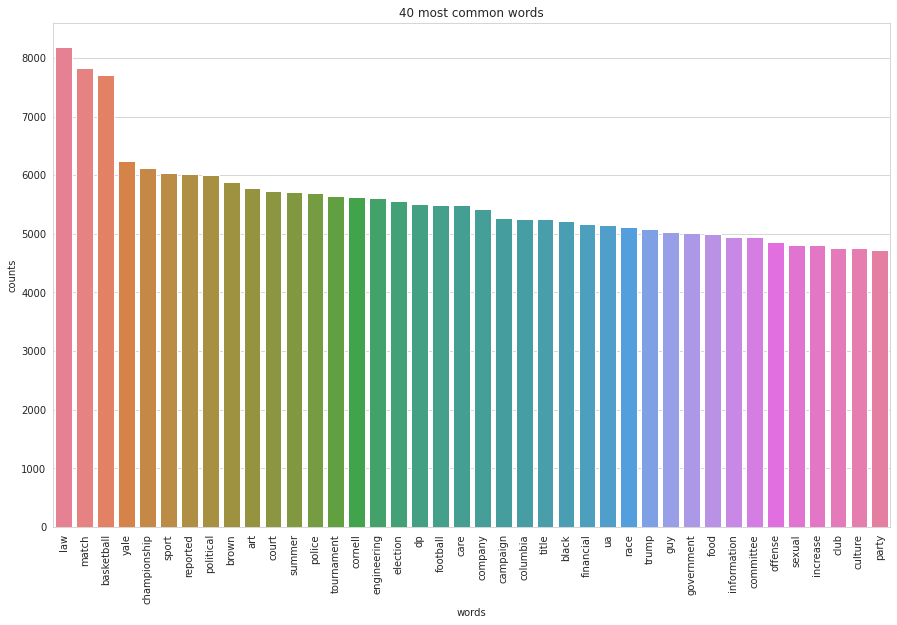

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_40_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[:40]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='40 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    return count_dict
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english', max_df=0.1, min_df=0.001)
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(sample_data['content_p'])

# Visualise the 10 most common words
count_dict = plot_40_most_common_words(count_data, count_vectorizer)

In [23]:
#function to print lda and top documents

import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
documents = sample_data['content'].tolist() 
# Helper function
def print_topics(model, count_vectorizer, n_top_words, no_top_documents, no_chars):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        W = model.transform(count_data)
       
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
          print(doc_index)
          print (documents[doc_index])

In [24]:
number_topics = 20
number_words = 20
number_documents = 10
# Create and fit the LDA model
random_number = np.random.random()
print(random_number)
lda = LDA(n_components=number_topics, n_jobs=-1, random_state=42)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words, number_documents, 150)

0.5814117127567288
Topics found via LDA:

Topic #0:
reported suspect block male unaffiliated st theft female arrested unknown bike walnut removed located man police 45 oct vehicle spruce
2261
Assault Oct. 8 — Bruce Alvardo, 24, unaffiliated with the University and of the 3300 block of N. Phillip Street, was arrested at about 4:45 a.m. for allegedly assaulting a police officer at 7-11, located at 106 S. 38th St. Oct. 8 — Bruce Alvardo, 24, unaffiliated with the University and of the 3300 block of N. Phillip Street, was arrested at about 1:15 a.m. at 7-11, located at 106 S. 38th St, for allegedly assaulting a female complainant, 22, also unaffiliated with the University, during a domestic dispute. Oct. 6 — Thomas Gura, 22, unaffiliated with the University and of the 1500 block of S. Hollywood Street, was arrested at about 6:15 p.m. for allegedly assaulting a police officer at the intersection of Convention Avenue and South Street. Oct. 4 — A male student, 33, reported at about 12:10 a.m.

In [25]:
import joblib

In [26]:
filename = 'lda_model20.sav'
joblib.dump(lda, filename)

['lda_model20.sav']